In [188]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [189]:
df = pd.read_csv("Adidas_Sales.csv")
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,43831,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000.00,0.50,In-store
1,Foot Locker,1185732,43832,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000.00,0.30,In-store
2,Foot Locker,1185732,43833,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000.00,0.35,In-store
3,Foot Locker,1185732,43834,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875.00,0.35,In-store
4,Foot Locker,1185732,43835,Northeast,New York,New York,Men's Apparel,60,900,540000,162000.00,0.30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,44220,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.00,0.28,Outlet
9644,Foot Locker,1185732,44220,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.60,0.32,Outlet
9645,Foot Locker,1185732,44249,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet
9646,Foot Locker,1185732,44249,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.80,0.42,Outlet


In [190]:
pd.DataFrame(df.isnull().sum(), columns=['Null Values'])

,Null Values
Retailer,0
Retailer ID,0
Invoice Date,0
Region,0
State,0
City,0
Product,0
Price per Unit,0
Units Sold,0
Total Sales,0


In [191]:
#df = df.drop(['Unnamed: 14'], axis=1)
df = df.drop(['Retailer'], axis=1)
df = df.drop(['Retailer ID'], axis=1)
df = df.drop(['Invoice Date'], axis=1)

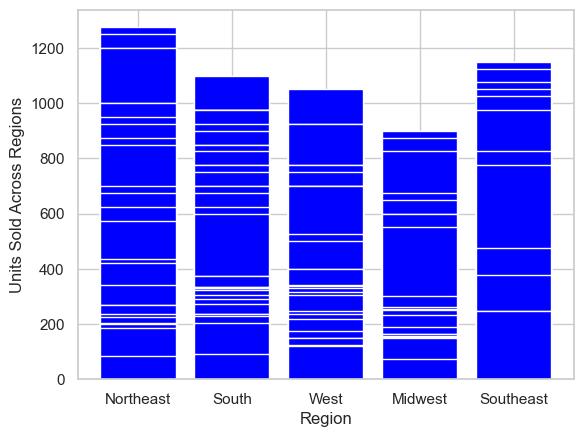

In [204]:
plt.bar(df['Region'], df['Units Sold'], color= 'blue')
plt.xlabel('Region')
plt.ylabel('Units Sold Across Regions')
plt.show()

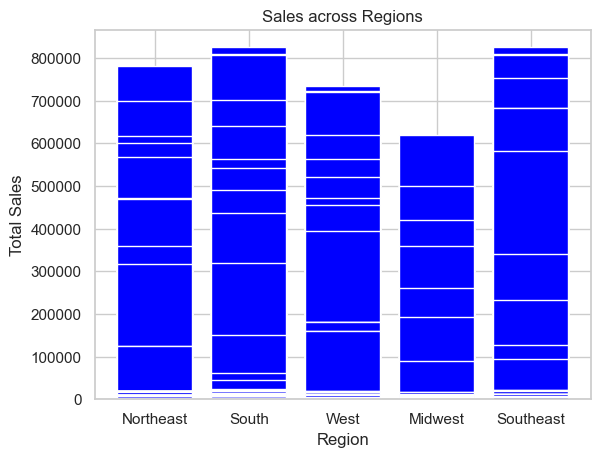

In [203]:
plt.bar(df['Region'], df['Total Sales'], color = 'blue')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Sales across Regions')
plt.show()

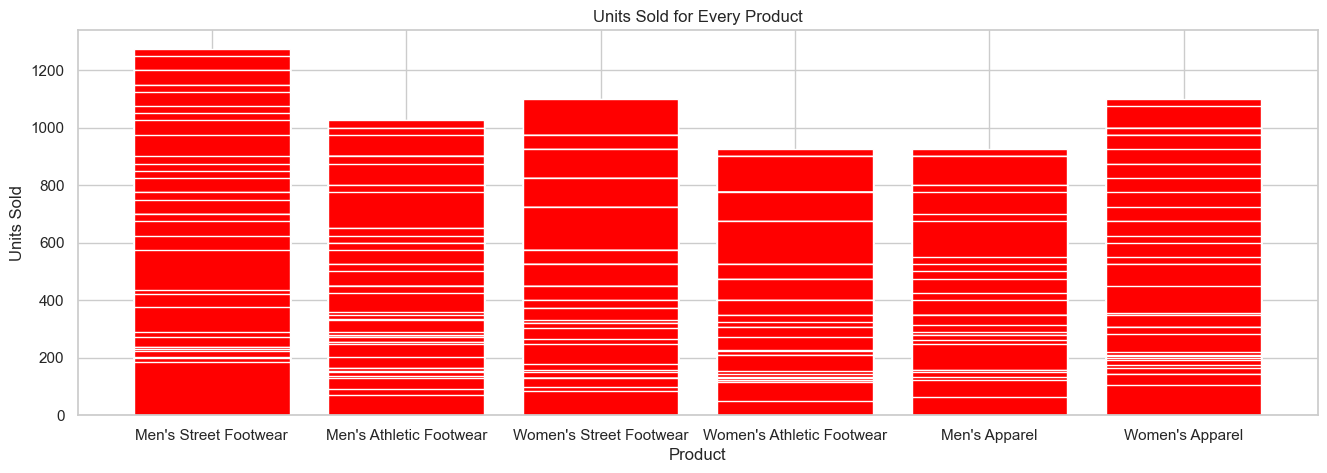

In [202]:
plt.figure(figsize= (16,5))
plt.bar(df['Product'], df['Units Sold'], color = 'red')
plt.xlabel('Product')
plt.ylabel('Units Sold')
plt.title('Units Sold for Every Product')
plt.show()

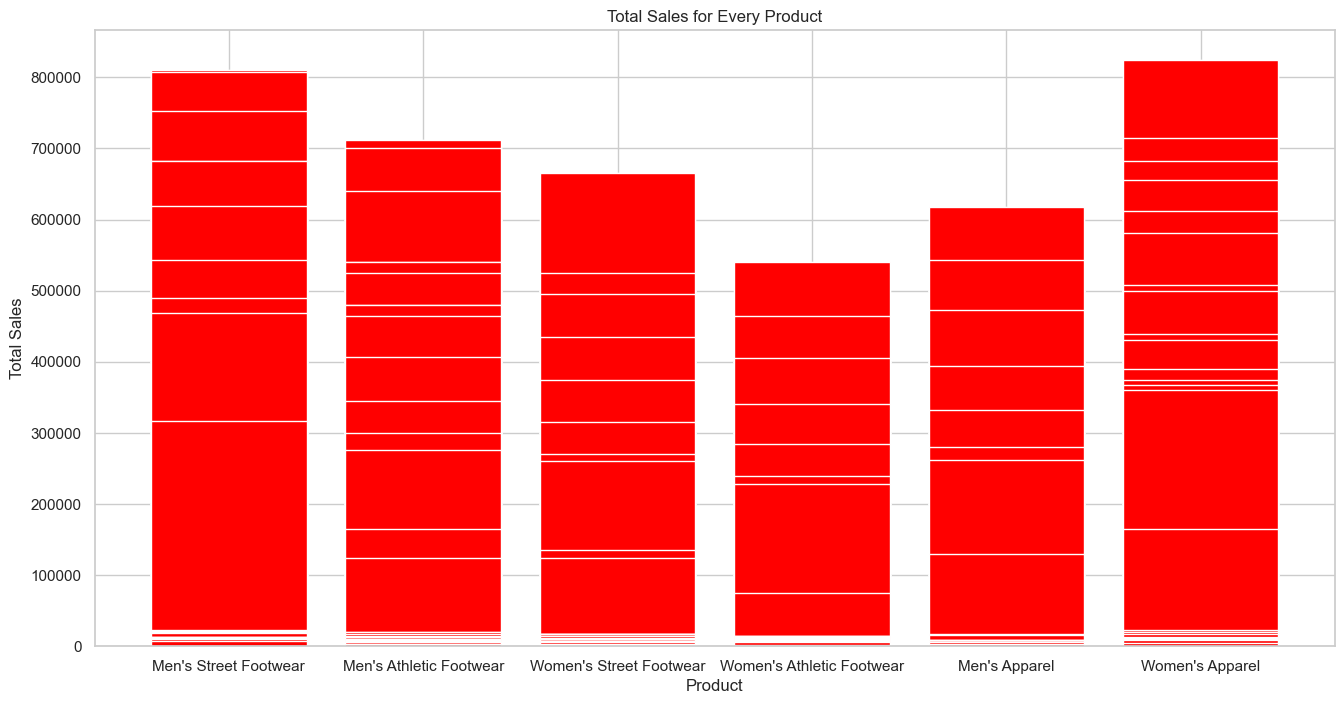

In [201]:
plt.figure(figsize= (16,8))
plt.bar(df['Product'], df['Total Sales'], color = 'red')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Total Sales for Every Product')
plt.show()

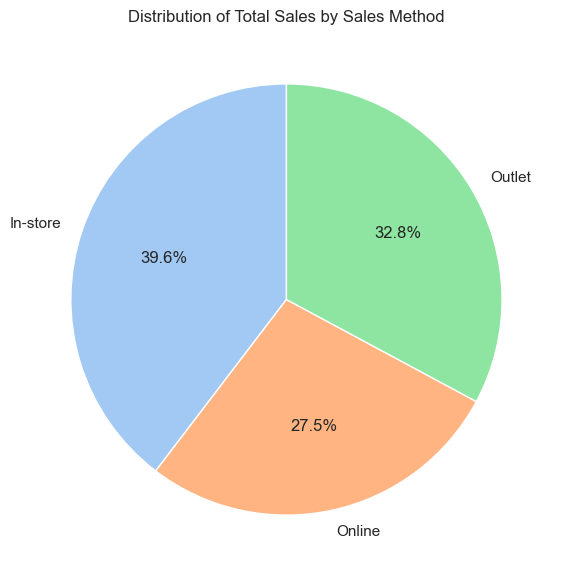

In [205]:
plt.figure(figsize=(7, 7))
sns.set(style="whitegrid")
sales_by_method = df.groupby('Sales Method')['Total Sales'].sum().reset_index()
plt.pie(sales_by_method['Total Sales'], labels=sales_by_method['Sales Method'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribution of Total Sales by Sales Method')
plt.show()

In [157]:
label_encoder1 = preprocessing.LabelEncoder()
label_encoder2 = preprocessing.LabelEncoder()
label_encoder3 = preprocessing.LabelEncoder()
label_encoder4 = preprocessing.LabelEncoder()
label_encoder5 = preprocessing.LabelEncoder()

df['Region'] = label_encoder1.fit_transform(df['Region'])
df['State'] = label_encoder2.fit_transform(df['State'])
df['City'] = label_encoder3.fit_transform(df['City'])
df['Product'] = label_encoder4.fit_transform(df['Product'])
df['Sales Method'] = label_encoder5.fit_transform(df['Sales Method'])

In [158]:
imputer = KNNImputer(n_neighbors = 2)
imputer.fit_transform(df)

array([[1.00000e+00, 3.10000e+01, 3.50000e+01, ..., 3.00000e+05,
        5.00000e-01, 0.00000e+00],
       [1.00000e+00, 3.10000e+01, 3.50000e+01, ..., 1.50000e+05,
        3.00000e-01, 0.00000e+00],
       [1.00000e+00, 3.10000e+01, 3.50000e+01, ..., 1.40000e+05,
        3.50000e-01, 0.00000e+00],
       ...,
       [1.00000e+00, 2.80000e+01, 3.00000e+01, ..., 2.79128e+03,
        3.70000e-01, 2.00000e+00],
       [1.00000e+00, 2.80000e+01, 3.00000e+01, ..., 1.23480e+03,
        4.20000e-01, 2.00000e+00],
       [1.00000e+00, 2.80000e+01, 3.00000e+01, ..., 6.49890e+02,
        2.70000e-01, 2.00000e+00]])

In [174]:
df.corr()

,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
Region,1.000000,-0.158290,-0.016701,-0.000165,0.210251,0.163450,0.121705,0.085980,-0.108468,0.136477
State,-0.158290,1.000000,0.095303,0.000191,-0.078057,0.002320,-0.013876,-0.003930,0.043242,-0.098631
City,-0.016701,0.095303,1.000000,0.000194,0.004256,-0.068049,-0.032194,-0.060216,-0.096360,-0.008978
Product,-0.000165,0.000191,0.000194,1.000000,-0.169039,-0.012099,-0.031904,-0.028544,0.022601,-0.000109
Price per Unit,0.210251,-0.078057,0.004256,-0.169039,1.000000,0.265869,0.435811,0.394546,-0.137486,-0.162323
Units Sold,0.163450,0.002320,-0.068049,-0.012099,0.265869,1.000000,0.913431,0.892379,-0.305479,-0.118423
Total Sales,0.121705,-0.013876,-0.032194,-0.031904,0.435811,0.913431,1.000000,0.956307,-0.364592,-0.190994
Operating Profit,0.085980,-0.003930,-0.060216,-0.028544,0.394546,0.892379,0.956307,1.000000,-0.211920,-0.176466
Operating Margin,-0.108468,0.043242,-0.096360,0.022601,-0.137486,-0.305479,-0.364592,-0.211920,1.000000,0.048666
Sales Method,0.136477,-0.098631,-0.008978,-0.000109,-0.162323,-0.118423,-0.190994,-0.176466,0.048666,1.000000


In [159]:
X = df[['Units Sold']]
y = df['Operating Profit']

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [161]:
lr = LinearRegression()

In [162]:
lr.fit(X_train, y_train)

LinearRegression()

In [163]:
pred = lr.predict(X_test)
pred

array([ 66743.0802691 ,  29004.58685737,  18835.53174643, ...,
       -10993.69657901, -17547.0876505 , 106289.40570055])

In [164]:
diff = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
diff.head(20)

,Actual,Predicted
2997,70000.00,66743.080269
7903,5410.26,29004.586857
4012,4241.28,18835.531746
2392,102375.00,123237.830885
3284,48000.00,44145.180023
7619,1949.22,-1502.578475
1263,48125.00,55444.130146
795,15750.00,10248.329653
8907,1767.00,10248.329653
2513,36000.00,44145.180023


In [165]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [166]:
R2 = r2_score(y_test, pred)
mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
print("Accuracy: ", R2.round(2)*100,'%')
print("R2 Score: ", R2)
print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)

Accuracy:  79.0 %
R2 Score:  0.7899258470421948
Mean Absolute Error:  16242.361290411658
Mean Squared Error:  633862293.9280322


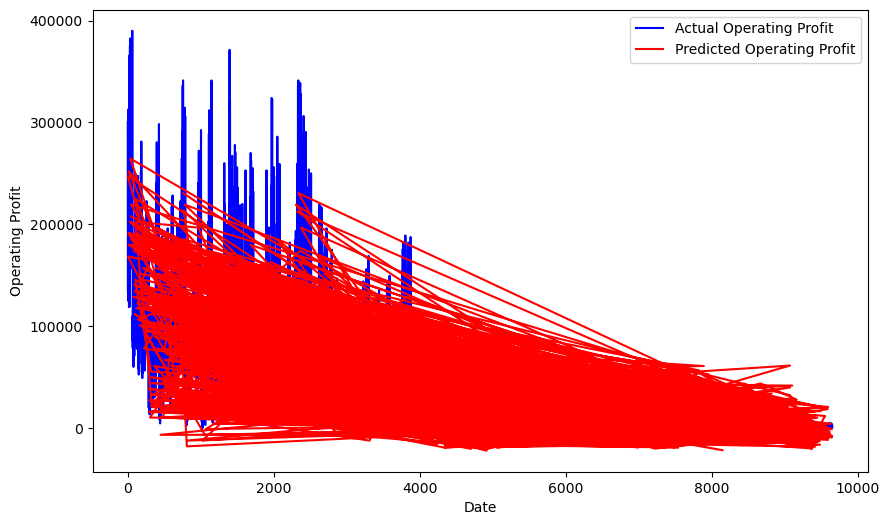

In [167]:
plt.figure(figsize=(10, 6))
plt.plot(y.index, y, label='Actual Operating Profit', color='blue')
plt.plot(y_test.index, pred, label='Predicted Operating Profit', color='red')
plt.xlabel('Date')
plt.ylabel('Operating Profit')
plt.legend()
plt.show()